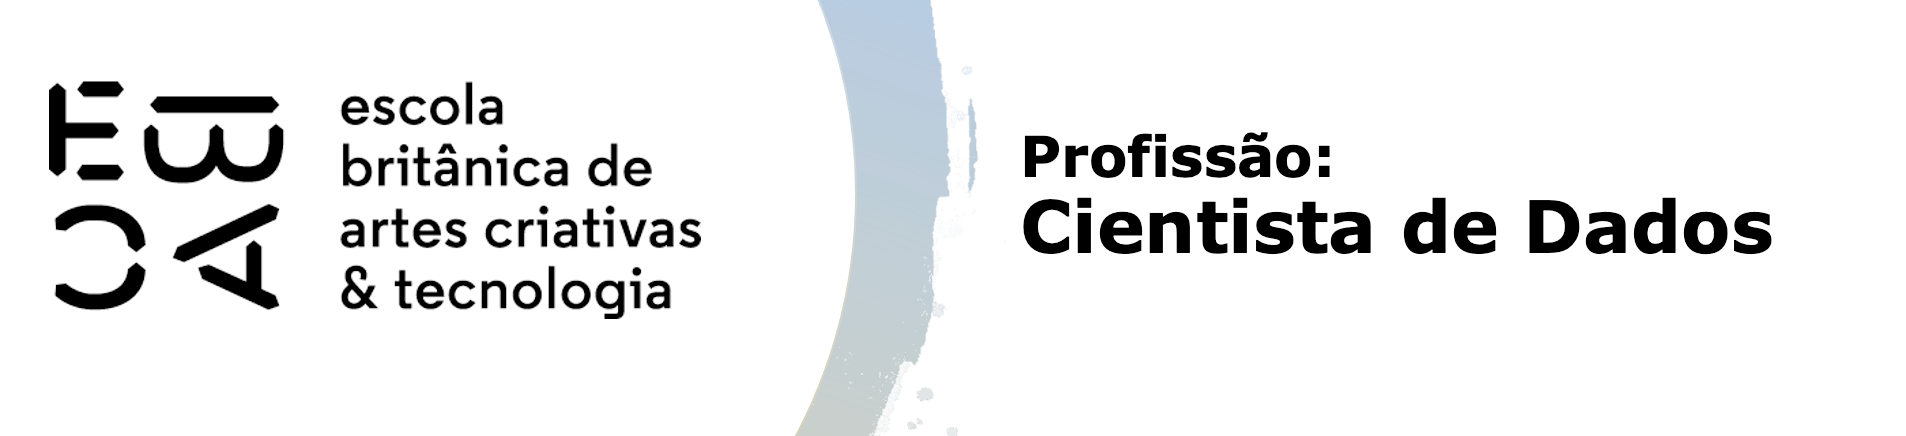

# Tarefa II

Ainda sobre a base da NFP vista na tarefa passada:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [3]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [88]:
def importacao():
    dados = pd.read_pickle('./dados/base_nfp.pkl')
    dados['Situação do Crédito'] = dados['Situação do Crédito'].str.strip()
    dados = dados.loc[dados['Situação do Crédito'] != 'A Calcular']
    return dados

In [89]:
df = importacao()
df.head()

CNPJ emit.                                           Emitente  \
0  03.476.811/0741-98                      DIA BRASIL SOCIEDADE LIMITADA   
1  43.101.310/0001-05                         AUTO POSTO ZANWAL LTDA EPP   
2  23.750.257/0001-66  OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE   
3  23.750.257/0001-66  OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE   
4  23.750.257/0001-66  OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE   

    No. Data Emissão  Valor NF Data Registro  Créditos Situação do Crédito  \
0   537   2017-06-30     24.68    2017-06-30      0.00            Liberado   
1  2894   2017-06-30     50.00    2017-06-30      0.00            Liberado   
2   699   2017-06-30     27.00    2017-06-30      0.44            Liberado   
3   698   2017-06-30    111.50    2017-06-30      1.81            Liberado   
4   694   2017-06-30    125.00    2017-06-30      2.03            Liberado   

    Ano  Semestre   Retorno  flag_credito     categoria  
0  2017         1  0.000000             0       Mercado  
1  2017         1  0.000000             0    Auto posto  
2  2017         1  0.016296             1  Restaurantes  
3  2017         1  0.016233             1  Restaurantes  
4  2017         1  0.016240             1  Restaurantes

## Criando variáveis

**Variáveis temporais**: É possível que haja alguma regra de liberação de créditos de acordo com o dia do mês, o dia da semana, fim de semana (sim ou não), ou até alterações temporais da regra. Vamos criar as seguintes variáveis para testar estas hipóteses:

- Dia da semana
- Dummy para fim de semana
- Dia do mês
- Mês (já na base)
- Trimestre
- Ano (já na base)

**Valor da nota**: Vamos criar também algumas variáveis para resumir o valor da nota, e posteriormente criar uma intuição sobre categorizações de variáveis contínuas.

- Crie categorizações da variável ```Valor NF```, por quantís, em 5, 10, 20 e 50 categorias.

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187634 entries, 0 to 187645
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   CNPJ emit.           187634 non-null  object        
 1   Emitente             187634 non-null  object        
 2   No.                  187634 non-null  int64         
 3   Data Emissão         187634 non-null  datetime64[ns]
 4   Valor NF             187634 non-null  float64       
 5   Data Registro        187634 non-null  datetime64[ns]
 6   Créditos             187634 non-null  float64       
 7   Situação do Crédito  187634 non-null  object        
 8   Ano                  187634 non-null  int64         
 9   Semestre             187634 non-null  int64         
 10  Retorno              186654 non-null  float64       
 11  flag_credito         187634 non-null  int64         
 12  categoria            187634 non-null  object        
dtypes: datetime64[ns](2

In [91]:
def decomposicao(dt,coluna_data):
    """Função para decomposição dos dados temporais."""
    # Cópia de segurança
    dados = dt.copy()
    # Decomposição dos dados temporais
    dados['Mês'] = dados[coluna_data].dt.month
    dados['Dia da semana'] = dados[coluna_data].dt.day_name()
    dados['Dia do mês'] = dados[coluna_data].dt.day
    dados['Final de Semana'] = dados[coluna_data].dt.dayofweek // 5 
    dados['Trimestre'] = dados[coluna_data].dt.quarter
    # Categorização do valor NF.
    dados['Bin 5 Valo NF'] = pd.qcut(df['Valor NF'], q=5).astype(str)
    dados['Bin 10 Valo NF'] = pd.qcut(df['Valor NF'], q=10).astype(str)
    dados['Bin 20 Valo NF'] = pd.qcut(df['Valor NF'], q=20).astype(str)
    dados['Bin 50 Valo NF'] = pd.qcut(df['Valor NF'], q=50).astype(str)
    return dados

In [92]:
dado = decomposicao(df,'Data Emissão')
dado.head()

CNPJ emit.                                           Emitente  \
0  03.476.811/0741-98                      DIA BRASIL SOCIEDADE LIMITADA   
1  43.101.310/0001-05                         AUTO POSTO ZANWAL LTDA EPP   
2  23.750.257/0001-66  OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE   
3  23.750.257/0001-66  OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE   
4  23.750.257/0001-66  OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE   

    No. Data Emissão  Valor NF Data Registro  Créditos Situação do Crédito  \
0   537   2017-06-30     24.68    2017-06-30      0.00            Liberado   
1  2894   2017-06-30     50.00    2017-06-30      0.00            Liberado   
2   699   2017-06-30     27.00    2017-06-30      0.44            Liberado   
3   698   2017-06-30    111.50    2017-06-30      1.81            Liberado   
4   694   2017-06-30    125.00    2017-06-30      2.03            Liberado   

    Ano  Semestre  ...     categoria  Mês Dia da semana  Dia do mês  \
0  2017         1  ...       Mercado    6        Friday          30   
1  2017         1  ...    Auto posto    6        Friday          30   
2  2017         1  ...  Restaurantes    6        Friday          30   
3  2017         1  ...  Restaurantes    6        Friday          30   
4  2017         1  ...  Restaurantes    6        Friday          30   

  Final de Semana  Trimestre    Bin 5 Valo NF   Bin 10 Valo NF  \
0               0          2   (13.36, 28.61]   (20.28, 28.61]   
1               0          2    (28.61, 55.0]    (38.88, 55.0]   
2               0          2   (13.36, 28.61]   (20.28, 28.61]   
3               0          2  (55.0, 131.364]  (81.8, 131.364]   
4               0          2  (55.0, 131.364]  (81.8, 131.364]   

       Bin 20 Valo NF    Bin 50 Valo NF  
0       (24.5, 28.61]    (23.62, 25.14]  
1      (46.022, 55.0]     (48.0, 50.72]  
2       (24.5, 28.61]     (26.9, 28.61]  
3  (101.488, 131.364]  (107.041, 119.5]  
4  (101.488, 131.364]  (119.5, 131.364]  

[5 rows x 22 columns]

## Calcule o IV de todas essas variáveis

Sugestão: Construa um metadados e tente utilizar uma função como a que foi utilizada durante a aula. Você vai conseguir fazer esse cálculo para as variáveis uma a uma, mas em casos reais em que vamos mais além na criação de variáveis, podemos ter centenas, ou até milhares de variáveis, esses cálculos *precisam* ser automáticos nesses casos.

In [ ]:
def IV(variavel, resposta):
    tab = pd.crosstab(variavel, resposta, margins=True, margins_name='total')
    
    rotulo_evento = tab.column

In [149]:
class IV:
    def __init__(self):
        self.dt = dado.copy()
        self.iv = self.IV_total()
        
    def IV_calculo(self, coluna):
        # Criar uma tabela com o total de eventos (0) e não eventos (1).
        tab = pd.crosstab(self.dt[coluna], self.dt['flag_credito'], margins=True, margins_name='total')

        # Defino qual é a coluna de evento e não evento (somente o nome da coluna)
        rotulo_evento = tab.columns[0]
        rotulo_nao_evento = tab.columns[1]

        # Encontro a porcentagem de cada evento e não evento os divindindo pelos totais
        tab['pct_evento'] = tab[rotulo_evento]/tab.loc['total', rotulo_evento]
        tab['pct_nao_evento'] = tab[rotulo_nao_evento]/tab.loc['total', rotulo_nao_evento]

        # WOE
        tab['woe'] = np.log(tab.pct_evento/tab.pct_nao_evento)
        # IV
        tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento) * tab.woe

        return tab['iv_parcial'].sum()
        
    def IV_total(self):
        colunas = dado.nunique()[dado.nunique() <= 50].index.tolist()
        colunas.remove('flag_credito')
        chave = list()
        for col in colunas:
            iv  = self.IV_calculo(col)
            chave.append([col, iv])


        return pd.DataFrame(data=chave, columns = ['Variavel','IV']).sort_values(by='IV',ascending=False)
    def classes(self,x):
        if x <0.02:
            return 'inútil'
        elif (x>=0.02) & (x<0.1):
            return 'Fraco'
        elif (x>=0.1) & (x<0.3):
            return "Médio"
        elif (x>=0.3) & (x<0.5):
            return "Forte"
    
    def grafico(self):
        resultado = self.iv
        resultado['Poder preditivo'] = resultado['IV'].apply(lambda x: self.classes(x))
        
        sns.set(style='whitegrid')
        plt.figure(figsize=(10,6))
        plt.suptitle('Poder Preditivo dos Atributos Categóricos', fontsize=25)
        sns.barplot(data = resultado, orient='h', x='IV', y='Variavel', hue='Poder preditivo')
    
        return plt.show();
    

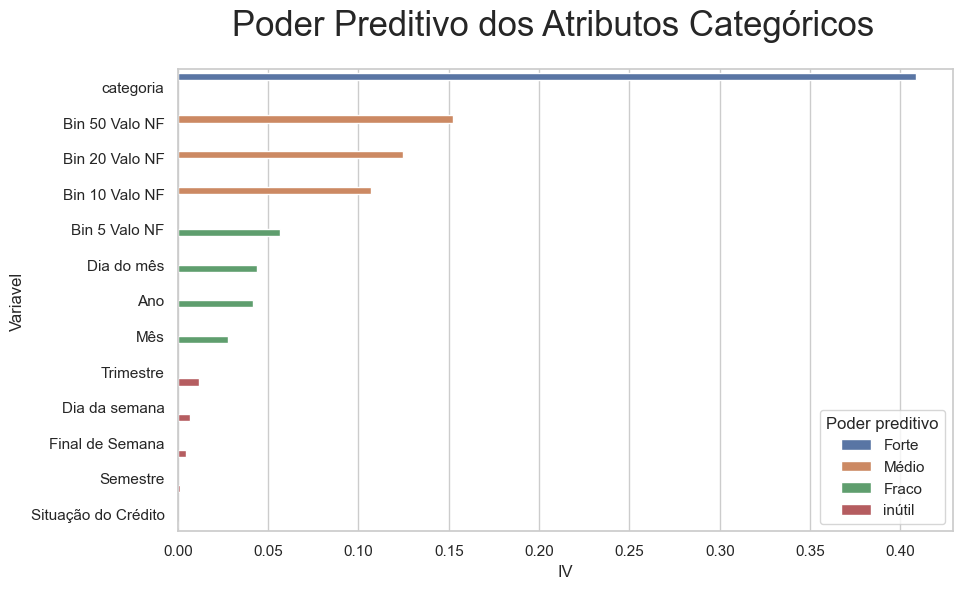

In [150]:
IV().grafico()

## Conclua

- Quais variáveis parecem apresentar maior poder de discriminação segundo o IV?
- Quando categorizamos variáveis contínuas parece haver alguma relação entre o número de categorias e o IV?

<div style="background-color: #f2f2f2; padding: 20px;">
    <h1 style="color: #333333;">Análisando Resultados</h1>
    <p style="color: #555555;">Ao analisar o IV acima, uma variável se destaca com o poder preditivo forte elevado, sendo o atributo "categoria", apresentando um IV superior a 0.4, um valor alto, mas não acima de 0.5 que seria considerado suspeito. Outras variáveis que paresentaram resultados supreendentes foram as categorizações da variável contínua Valor NF, em destaque para a que apresentou maior quantidade de categorias.</p>
</div>

## Descritiva simples no tempo

Para compor a análise que virá a seguir, faça uma análise descritiva básica no tempo - utilize trimestre como agregação (ou uma média móvel por trimestre, como preferir) e avalie graficamente:

- A quantidade de notas registradas na base por período
- A quantidade de notas por categoria e por período
- A proporção de notas com crédito por categoria por período

In [351]:
class analise:
    def __init__(self):
        self.g1 = dado.groupby(['Trimestre'])[['Trimestre']].count()
        self.g2 = dado.groupby(['categoria','Trimestre'])[['Trimestre']].count().unstack()    
        self.g2 = self.g2['Trimestre'].reset_index().melt(id_vars='categoria', value_vars=[1,2,3,4])
        
    def analise_0(self):
        plt.figure(figsize=(12,20))
        tamanho = (2, 1)

        # Gráfico 1
        ax = plt.subplot2grid(
                tamanho,
                (0,0)
            )
        sns.barplot(x = self.g1.index, y=self.g1['Trimestre'], ax=ax)
        plt.title("Quantidade de notas registradas na base por período", fontsize=25)

        # Gráfico 2
        ax = plt.subplot2grid(
                tamanho,
                (1,0)
            )

        sns.barplot(data=self.g2,x='value',hue='Trimestre',y='categoria',orient='h', ax=ax)   
        plt.title("Quantidade de notas por categoria e por período", fontsize=25)
        return plt.show()
    
    def analise_1(self):
        plt.figure(figsize=(12,30))
        tamanho = (5, 2)
        a1 = pd.get_dummies(dado, columns=['flag_credito'])
        a1 = a1.groupby(['categoria','Trimestre'])[['flag_credito_0','flag_credito_1']].sum().unstack()  
        a1.loc['total',:] = a1.sum(0)
        for col in a1.columns:
            a1[col] = a1.loc[:,col] / a1.loc['total',col]
        a1.reset_index().columns.tolist()
        a1 = a1.reset_index().melt(id_vars=[('categoria', '')], value_vars=a1.reset_index().columns.tolist()[1:])
        a1.columns = ['categoria','flag','trimestre','value']
        categorias = a1['categoria'].unique()
        plt.subplots_adjust(top=0.94, # Distância do título para os gráficos.
                    hspace = 0.3, wspace=0.2)
        count = 0 
        plt.suptitle('Proporção de notas com crédito por categoria por período', fontsize=25)
        for row in range(5):
            for col in range(2):
                
                ax = plt.subplot2grid(
                    tamanho,
                    (row,col)
                )
                text = categorias[count]
                
                a2 = a1.loc[a1['categoria'] == categorias[count]]
                fig = sns.lineplot(data=a2, y='value',x='trimestre',hue='flag')
                
                plt.title(text, fontsize=15)
                #ax.set_xticklabels([1.,2.,3.,4.])
                count += 1       
                
        

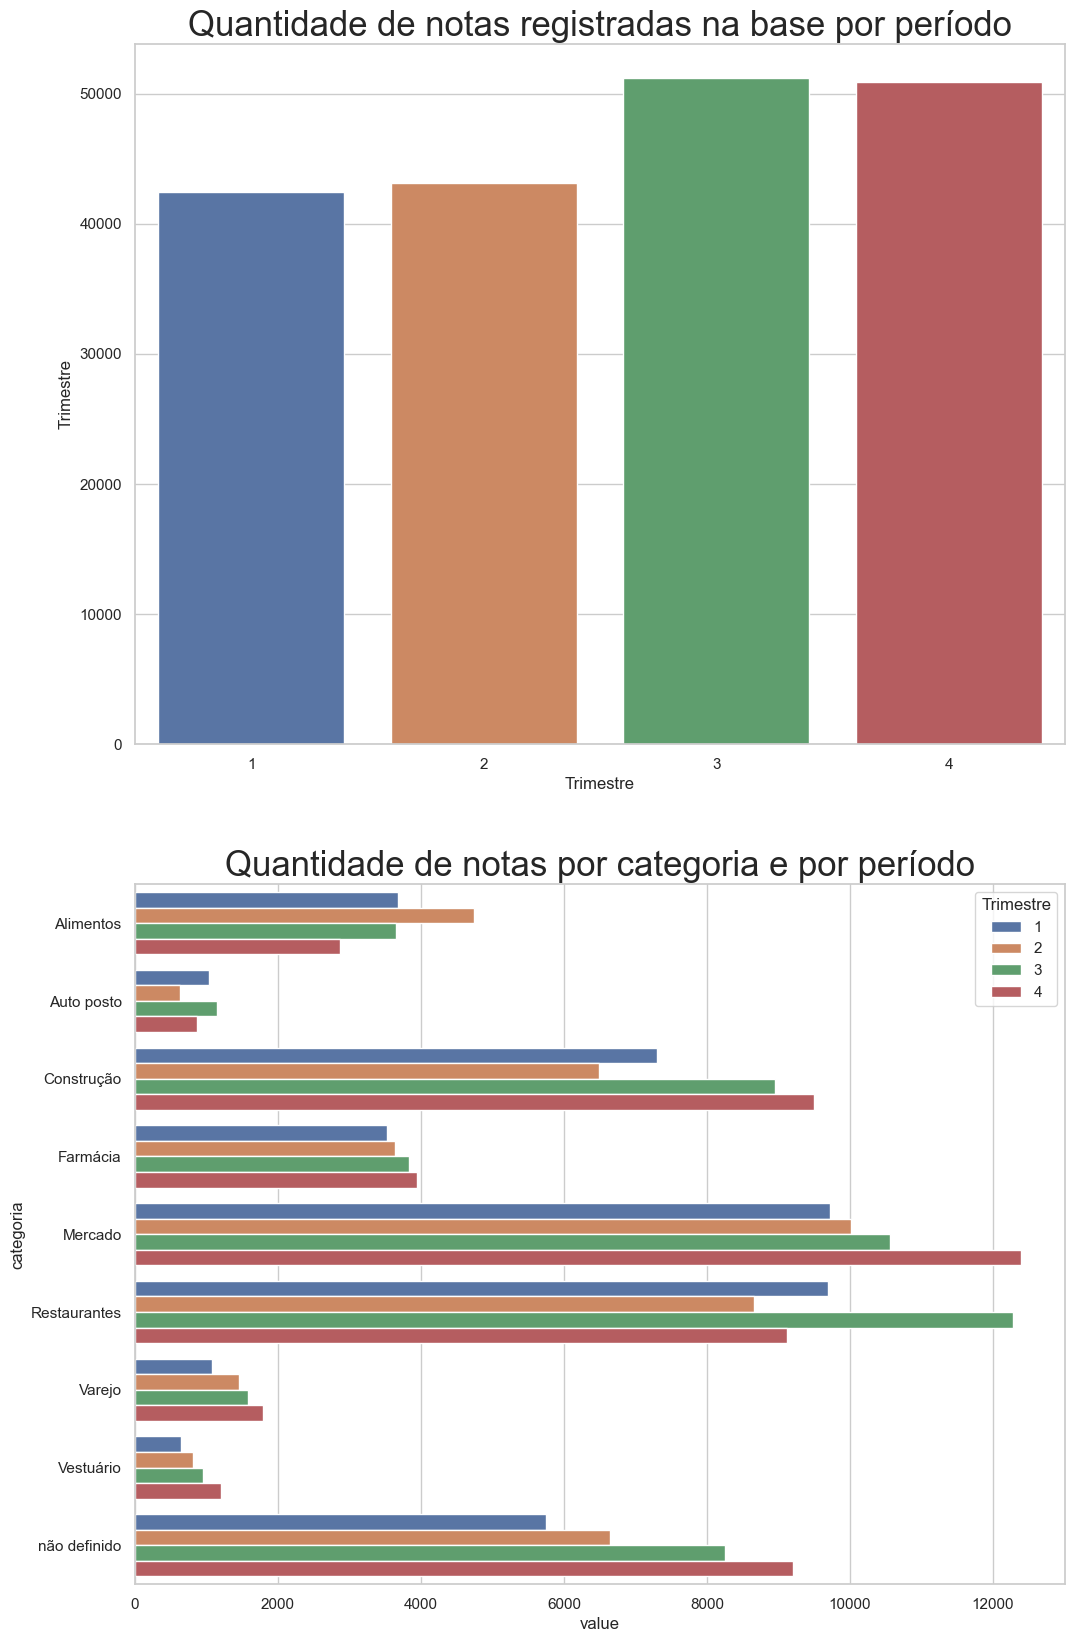

In [352]:
analise().analise_0()

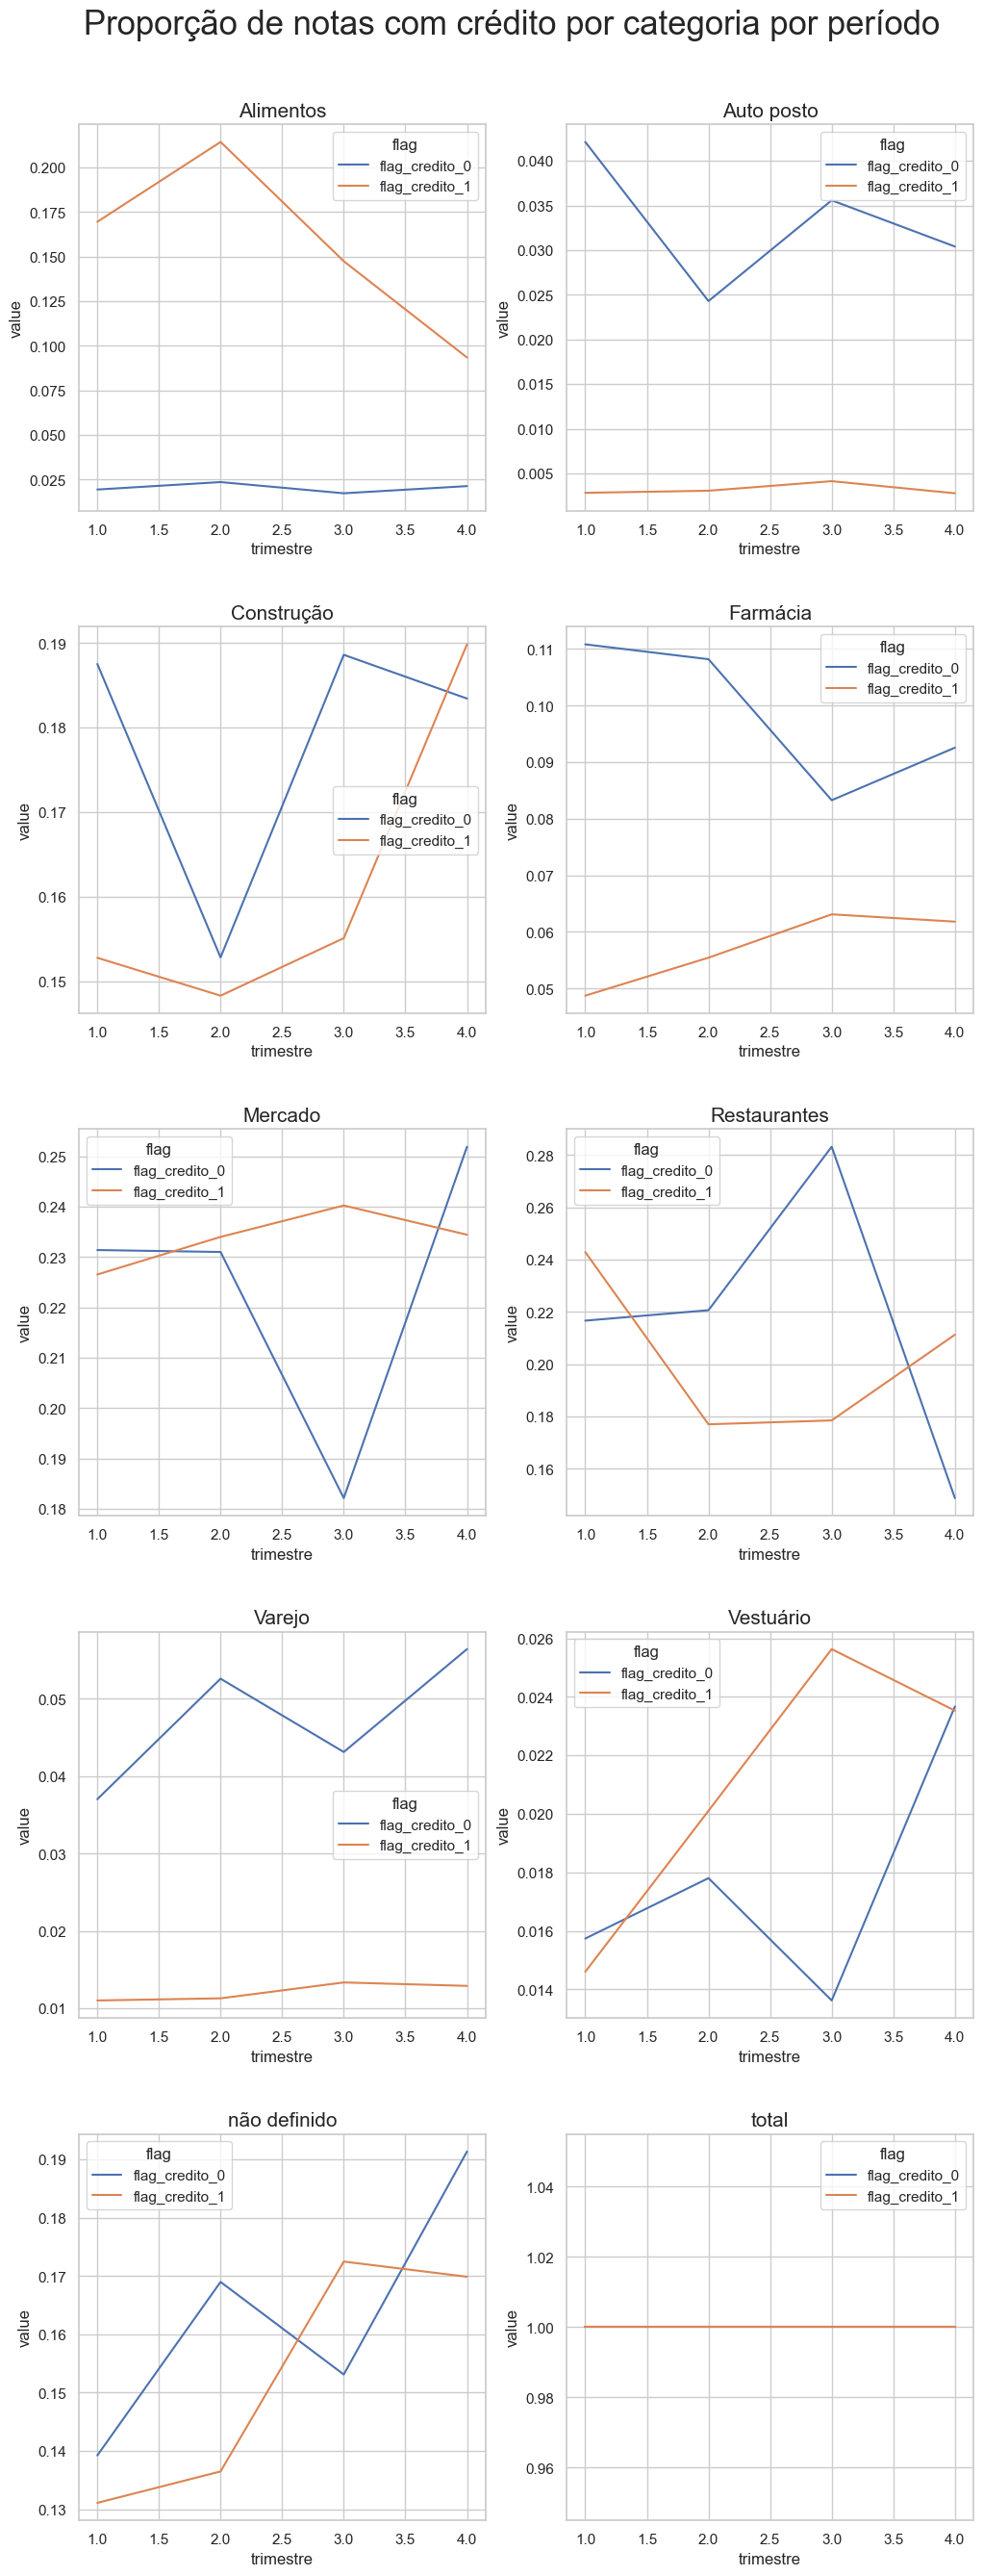

In [349]:
analise().analise_1()

## Avalie o WOE e o IV no tempo

Avalie o WOE e o IV no tempo da variável ```categoria```.

In [357]:
def IV_calculo():
    # Criar uma tabela com o total de eventos (0) e não eventos (1).
    tab = pd.crosstab(dado['categoria'], dado['flag_credito'], margins=True, margins_name='total')

    # Defino qual é a coluna de evento e não evento (somente o nome da coluna)
    rotulo_evento = tab.columns[0]
    rotulo_nao_evento = tab.columns[1]

    # Encontro a porcentagem de cada evento e não evento os divindindo pelos totais
    tab['pct_evento'] = tab[rotulo_evento]/tab.loc['total', rotulo_evento]
    tab['pct_nao_evento'] = tab[rotulo_nao_evento]/tab.loc['total', rotulo_nao_evento]

    # WOE
    tab['woe'] = np.log(tab.pct_evento/tab.pct_nao_evento)
    # IV
    tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento) * tab.woe
    return tab.sort_values(by='woe', ascending=False)

IV_calculo()

flag_credito       0      1   total  pct_evento  pct_nao_evento       woe  \
categoria                                                                   
Auto posto      3417    271    3688    0.033176        0.003202  2.338093   
Varejo          4869   1035    5904    0.047274        0.012229  1.352180   
Farmácia       10051   4886   14937    0.097586        0.057728  0.524991   
Construção     18424  13811   32235    0.178881        0.163177  0.091882   
Restaurantes   22630  17118   39748    0.219717        0.202250  0.082839   
não definido   16818  13042   29860    0.163288        0.154092  0.057968   
total         102996  84638  187634    1.000000        1.000000  0.000000   
Mercado        22885  19808   42693    0.222193        0.234032 -0.051911   
Vestuário       1813   1799    3612    0.017603        0.021255 -0.188555   
Alimentos       2089  12868   14957    0.020282        0.152036 -2.014365   

flag_credito  iv_parcial  
categoria                 
Auto posto      0.070082  
Varejo          0.047387  
Farmácia        0.020925  
Construção      0.001443  
Restaurantes    0.001447  
não definido    0.000533  
total           0.000000  
Mercado         0.000615  
Vestuário       0.000689  
Alimentos       0.265399

## Conclua

- Quais categorias parece ter maior proporção de notas com retornos maiores que zero?
- Essas diferenças são estáveis no tempo?

Dicas:<br>
- Considere que a quantidade de notas vem aumentando
- Considere que há períodos bem atípicos no histórico
- Considere que a partir de janeiro de 2020 o público é mais parecido com o público atual (2022), seja por pandemia, seja por crescimento do público, e considere os dados dessa data em diante na sua conclusão.

<div style="background-color: #f2f2f2; padding: 20px;">
    <h1 style="color: #333333;">Análisando Resultados</h1>
    <h3 style="color: #333333;">Proporções maiores que zero</h3>
    <p style="color: #555555;">Analisando o WOE das classes do atributo categoria, os seguintes elementos com um certo destaque para um retorno maior que zero são: Auto posto, Varejo, Farmácia e construção. Apesar disso, ao analisar o IV, vemos que sua influência acaba sendo considerada fraca</p>
    <h3 style="color: #333333;">Proporções menores que zero</h3>
    <p style="color: #555555;">Analisando o WOE das classes do atributo categoria, os seguintes elementos com um certo destaque para um retorno menor que zero são: Alimentos e Vestuário. Ao analisar o IV, observa-se que o atributo Alimentos tem maior poder preditivo entreo todos atributos.</p>
</div>